In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read csv file into pandas DataFrame
skills_df = pd.read_csv('job_postings_data.csv', index_col=0)

In [3]:
skills_df.head(5)

,Job Tier,Job Type,Skill
0,Intermediate,Fixed-Price,Data Scraping
1,Intermediate,Fixed-Price,Web Scraping
2,Expert,Fixed-Price,Machine Learning
3,Intermediate,Fixed-Price,Appforfinance Financial Statement Analysis
4,Intermediate,Fixed-Price,Business Analysis


In [4]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 3 columns):
Job Tier    2187 non-null object
Job Type    2187 non-null object
Skill       2187 non-null object
dtypes: object(3)
memory usage: 68.3+ KB


-----------------------------------------------------

##Most sought-after skills on Upwork for Data Science and Analytics jobs

In [5]:
skills_df['Skill'].value_counts()[:60]

Microsoft Excel                        145
Data Mining                            106
Python                                  82
Data Entry                              81
Data Scraping                           74
Machine Learning                        69
Data Analytics                          64
Data Science                            56
Internet Research                       55
Web Scraping                            48
Data Visualization                      39
Statistics                              38
Excel VBA                               31
Analytics                               25
SQL                                     23
Quantitative Analysis                   22
Microsoft Power BI                      21
Data Extraction                         20
Financial Analysis                      20
Mathematics                             20
Tableau Software                        20
R                                       17
"Extract, Transform and Load (ETL)"     16
Research   

-------------------------------

##Job 'Type' and 'Tier' for most tagged skills

###1 Microsoft Excel

In [6]:
skills_df[skills_df['Skill']=='Microsoft Excel']['Job Type'].value_counts()

Hourly         75
Fixed-Price    70
Name: Job Type, dtype: int64

In [7]:
skills_df[skills_df['Skill']=='Microsoft Excel']['Job Tier'].value_counts()

Intermediate    59
Entry           55
Expert          31
Name: Job Tier, dtype: int64

###2 Data Mining

In [8]:
skills_df[skills_df['Skill']=='Data Mining']['Job Type'].value_counts()

Hourly         57
Fixed-Price    49
Name: Job Type, dtype: int64

In [9]:
skills_df[skills_df['Skill']=='Data Mining']['Job Tier'].value_counts()

Entry           48
Intermediate    43
Expert          15
Name: Job Tier, dtype: int64

###3 Python

In [10]:
skills_df[skills_df['Skill']=='Python']['Job Type'].value_counts()

Hourly         43
Fixed-Price    39
Name: Job Type, dtype: int64

In [11]:
skills_df[skills_df['Skill']=='Python']['Job Tier'].value_counts()

Intermediate    43
Expert          24
Entry           15
Name: Job Tier, dtype: int64

-----------------

##Most frequent skills for Entry Level jobs

In [12]:
skills_df[skills_df['Job Tier']=='Entry']['Skill'].value_counts()[:20]

Microsoft Excel             55
Data Mining                 48
Data Entry                  43
Internet Research           31
Data Scraping               24
Python                      15
Web Scraping                15
Data Analytics              12
Lead Generation              9
Virtual Assistant            8
Data Extraction              8
Data Science                 7
Research                     6
Excel VBA                    6
Financial Analysis           6
English                      5
Analytics                    5
Foreign Exchange Trading     4
Market Research              4
Data Visualization           3
Name: Skill, dtype: int64

##Most frequent skills for Intermediate Jobs

In [13]:
skills_df[skills_df['Job Tier']=='Intermediate']['Skill'].value_counts()[:20]

Microsoft Excel          59
Data Mining              43
Python                   43
Data Scraping            38
Machine Learning         37
Data Entry               32
Data Science             31
Data Analytics           30
Web Scraping             24
Statistics               18
Data Visualization       17
Internet Research        17
Excel VBA                13
Microsoft Power BI       13
Analytics                12
SQL                      12
R                        10
Mathematics               9
Tableau Software          8
Quantitative Analysis     8
Name: Skill, dtype: int64

##Most frequent skills for Expert jobs

In [14]:
skills_df[skills_df['Job Tier']=='Expert']['Skill'].value_counts()[:30]

Microsoft Excel                        31
Machine Learning                       29
Python                                 24
Data Analytics                         22
Data Visualization                     19
Data Science                           18
Statistics                             17
Data Mining                            15
Quantitative Analysis                  13
Data Scraping                          12
Tableau Software                       12
Excel VBA                              12
SQL                                    10
"Extract, Transform and Load (ETL)"    10
API Development                        10
Web Scraping                            9
Deep Learning                           9
Mathematics                             9
Artificial Intelligence                 8
Analytics                               8
PHP                                     8
Internet Research                       7
Financial Analysis                      7
TensorFlow                        

---------------

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Top 10 Frequent Skills

In [16]:
top = skills_df['Skill'].value_counts()[:10]
top_skills = top.index
top_count = top.values
top_df = skills_df[skills_df['Skill'].isin(list(top_skills))]

In [17]:
top_df.loc[:,'Count Order'] = top_df.loc[:,'Skill'].apply(lambda x: top[x])

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
top_df.head()

,Job Tier,Job Type,Skill,Count Order
0,Intermediate,Fixed-Price,Data Scraping,74
1,Intermediate,Fixed-Price,Web Scraping,48
2,Expert,Fixed-Price,Machine Learning,69
6,Intermediate,Fixed-Price,Data Analytics,64
8,Intermediate,Fixed-Price,Microsoft Excel,145


In [19]:
top_df = top_df.sort_values(by=['Count Order','Skill'], ascending=[0,1])
top_df.head()

,Job Tier,Job Type,Skill,Count Order
8,Intermediate,Fixed-Price,Microsoft Excel,145
27,Intermediate,Fixed-Price,Microsoft Excel,145
31,Intermediate,Fixed-Price,Microsoft Excel,145
52,Entry,Hourly,Microsoft Excel,145
61,Expert,Fixed-Price,Microsoft Excel,145


###Most Frequent Skills Plot

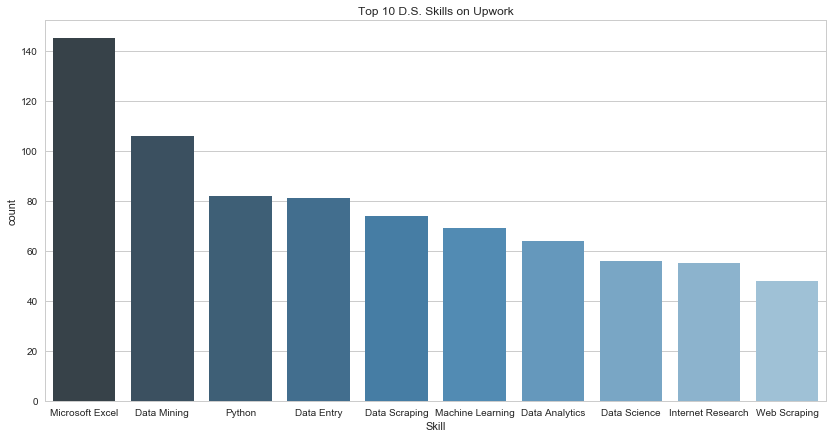

In [20]:
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.countplot(top_df['Skill'], palette="Blues_d")
plt.title("Top 10 D.S. Skills on Upwork")
#plt.savefig('top_10.jpeg', dpi=600)

###Most Frequent Skills with Job Tier Categories Plot

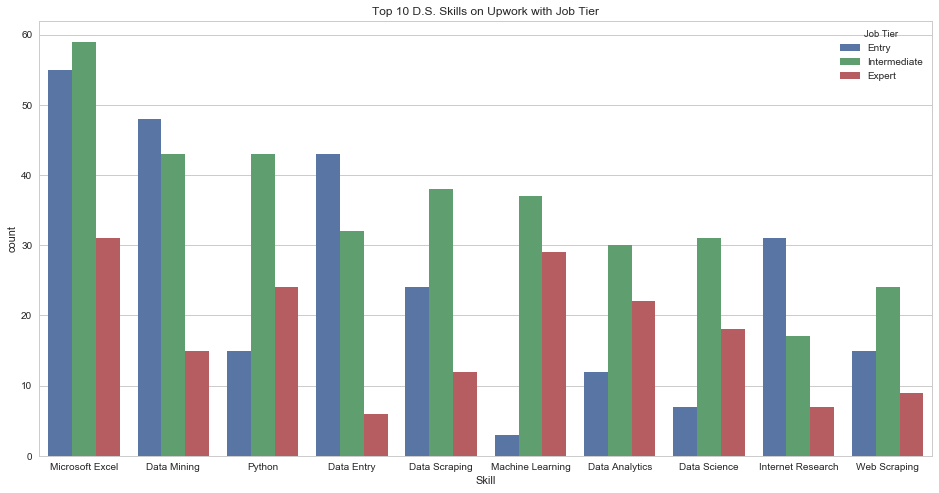

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(top_df['Skill'], hue=top_df['Job Tier'], hue_order=['Entry', 'Intermediate', 'Expert'], palette="deep")
plt.title('Top 10 D.S. Skills on Upwork with Job Tier')
#plt.savefig('top_10_tier.jpeg', dpi=600)

###Most Frequent Skills for Entry-Level Jobs Plot

In [22]:
entry_top = skills_df[skills_df['Job Tier']=='Entry']['Skill'].value_counts()[:10]
entry_top

Microsoft Excel      55
Data Mining          48
Data Entry           43
Internet Research    31
Data Scraping        24
Python               15
Web Scraping         15
Data Analytics       12
Lead Generation       9
Virtual Assistant     8
Name: Skill, dtype: int64

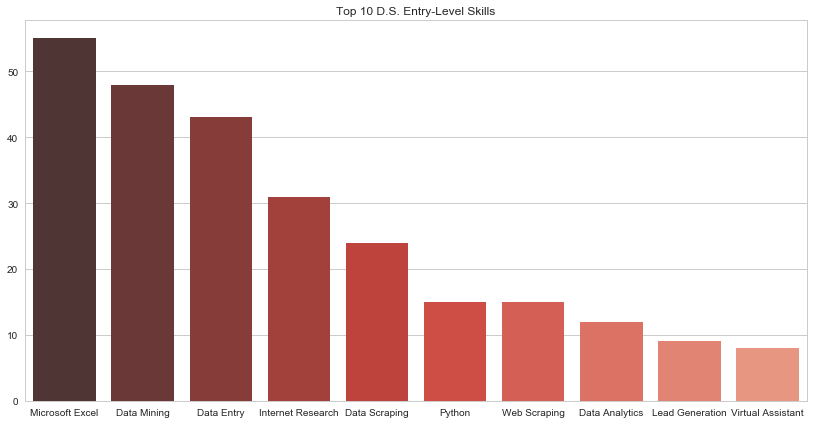

In [23]:
plt.figure(figsize=(14,7))
sns.barplot(entry_top.index, entry_top.values, palette='Reds_d')
plt.title('Top 10 D.S. Entry-Level Skills')
#plt.savefig('top_10_entry.jpeg', dpi=600)

###Most Frequent Skills for Intermediate Jobs Plot

In [24]:
intermediate_top = skills_df[skills_df['Job Tier']=='Intermediate']['Skill'].value_counts()[:10]
intermediate_top

Microsoft Excel     59
Data Mining         43
Python              43
Data Scraping       38
Machine Learning    37
Data Entry          32
Data Science        31
Data Analytics      30
Web Scraping        24
Statistics          18
Name: Skill, dtype: int64

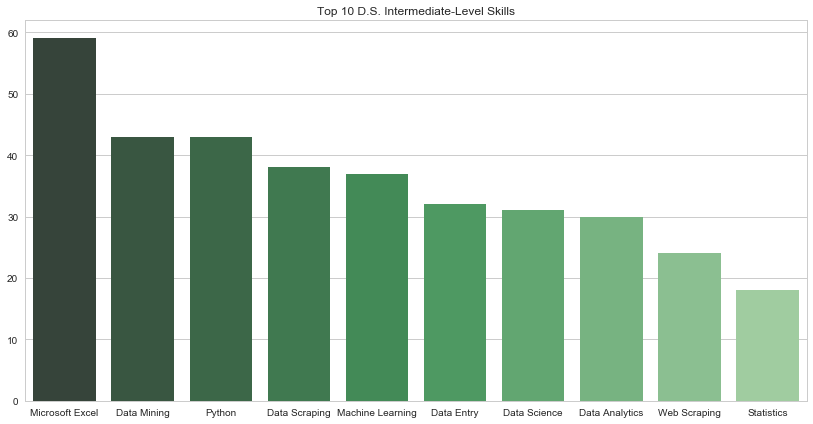

In [25]:
plt.figure(figsize=(14,7))
sns.barplot(intermediate_top.index, intermediate_top.values, palette='Greens_d')
plt.title('Top 10 D.S. Intermediate-Level Skills')
#plt.savefig('top_10_intermediate.jpeg', dpi=600)

###Most Frequent Skills for Expert Jobs

In [26]:
expert_top = skills_df[skills_df['Job Tier']=='Expert']['Skill'].value_counts()[:10]
expert_top

Microsoft Excel          31
Machine Learning         29
Python                   24
Data Analytics           22
Data Visualization       19
Data Science             18
Statistics               17
Data Mining              15
Quantitative Analysis    13
Data Scraping            12
Name: Skill, dtype: int64

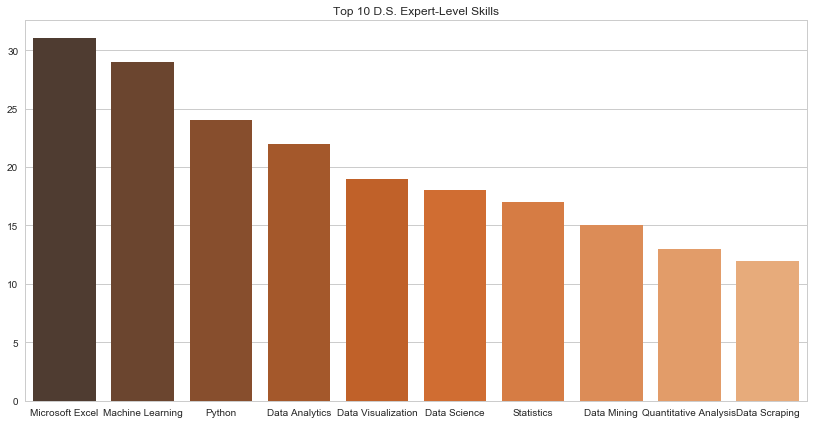

In [27]:
plt.figure(figsize=(14,7))
sns.barplot(expert_top.index, expert_top.values, palette='Oranges_d')
plt.title('Top 10 D.S. Expert-Level Skills')
#plt.savefig('top_10_expert.jpeg', dpi=600)

---------------------------------------

## Specific Skills

In [28]:
skills_df[skills_df['Skill']=='SAS']['Job Tier'].value_counts()

Intermediate    1
Expert          1
Name: Job Tier, dtype: int64

In [29]:
skills_df[skills_df['Skill']=='R']['Job Tier'].value_counts()

Intermediate    10
Expert           6
Entry            1
Name: Job Tier, dtype: int64

In [30]:
skills_df[skills_df['Skill']=='Java']['Job Tier'].value_counts()

Intermediate    4
Entry           1
Expert          1
Name: Job Tier, dtype: int64

In [31]:
skills_df[skills_df['Skill']=='Scala']['Job Tier'].value_counts()

Intermediate    1
Name: Job Tier, dtype: int64

In [44]:
skills_df[skills_df['Skill'].str.contains('(ETL)')]['Job Tier'].value_counts()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


Expert          10
Intermediate     4
Entry            2
Name: Job Tier, dtype: int64

In [45]:
skills_df[skills_df['Skill']=='Julia']['Job Tier'].value_counts()

Series([], Name: Job Tier, dtype: int64)

In [47]:
skills_df[skills_df['Skill']=='SQL']['Job Tier'].value_counts()

Intermediate    12
Expert          10
Entry            1
Name: Job Tier, dtype: int64

In [49]:
skills_df[skills_df['Skill'].str.contains('SQL')]

,Job Tier,Job Type,Skill
134,Intermediate,Fixed-Price,SQL
161,Entry,Fixed-Price,SQL
162,Entry,Fixed-Price,SQL Server Integration Services (SSIS)
211,Intermediate,Fixed-Price,MySQL Programming
338,Intermediate,Fixed-Price,MySQL Administration
450,Expert,Fixed-Price,SQL
467,Expert,Hourly,PostgreSQL Administration
468,Expert,Hourly,PostgreSQL Programming
472,Intermediate,Fixed-Price,SQL
479,Intermediate,Fixed-Price,SQL


In [50]:
skills_df[skills_df['Skill'].str.contains('SQL')]['Job Tier'].value_counts()

Expert          27
Intermediate    25
Entry            5
Name: Job Tier, dtype: int64

In [53]:
skills_df[skills_df['Skill']=='Apache Spark']['Job Tier'].value_counts()

Intermediate    7
Expert          2
Name: Job Tier, dtype: int64